In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')

In [34]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

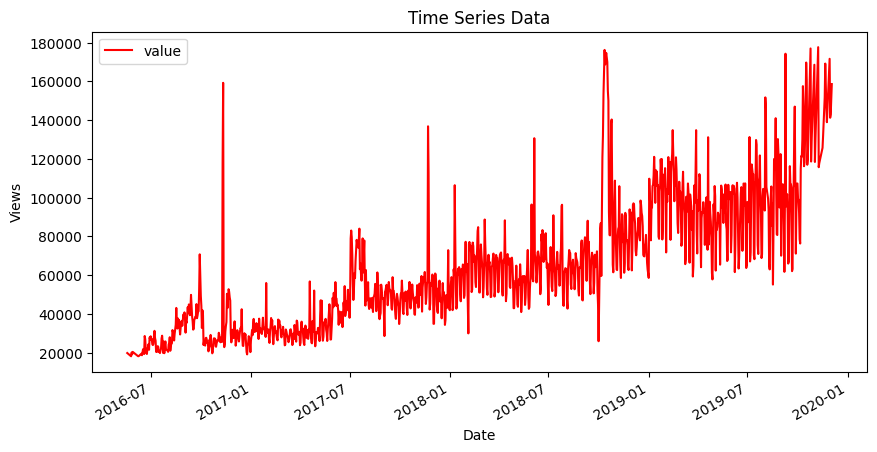

In [35]:
df.plot(figsize=(10,5), title='Time Series Data', color='red', xlabel = 'Date', ylabel='Views');

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year
list_month_cut = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec']
list_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December']

In [81]:
df_bar = df.groupby(['year','month'])[['value']].mean()
#df_bar = df_bar.sort_values('month')
#df_bar = df_bar.pivot_table(values='value', index='year', columns='month')
#df_bar = df_bar.unstack()
df_bar = df_bar.reset_index()
df_bar = df_bar.sort_values(['year', 'month'])
df_bar['month'] = pd.to_datetime(df_bar['month'], format='%m').dt.month_name()
df_bar.head()

,year,month,value
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667


In [82]:
df_bar = df_bar.pivot_table(values='value', index='year', columns='month')
df_bar.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


In [83]:
df_bar = df_bar[list_month]
df_bar.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


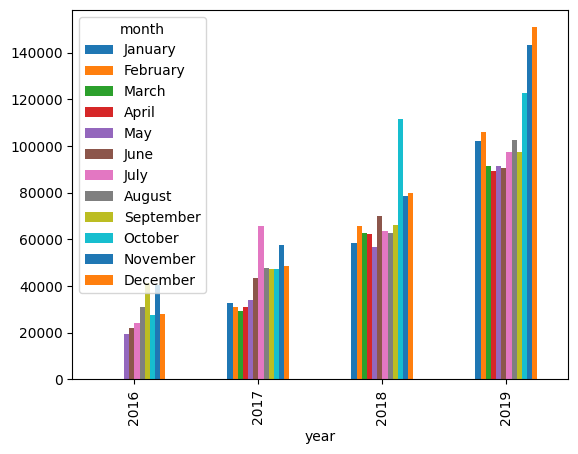

In [84]:
df_bar.plot.bar();

In [85]:
df['month_str'] = df.index.month_name()
df['month_str_sliced'] = df.index.month_name().str.slice(stop=3)
df.head()

,value,month,year,month_str,month_str_sliced
date,,,,,
2016-05-19,19736,5,2016,May,May
2016-05-26,18060,5,2016,May,May
2016-05-27,19997,5,2016,May,May
2016-05-28,19044,5,2016,May,May
2016-05-29,20325,5,2016,May,May


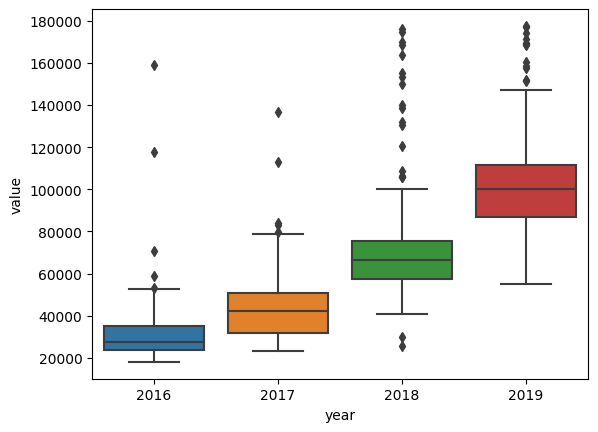

In [91]:
sns.boxplot(data=df, x='year', y='value');

In [89]:
df.head()

,value,month,year,month_str,month_str_sliced
date,,,,,
2016-05-19,19736,5,2016,May,May
2016-05-26,18060,5,2016,May,May
2016-05-27,19997,5,2016,May,May
2016-05-28,19044,5,2016,May,May
2016-05-29,20325,5,2016,May,May


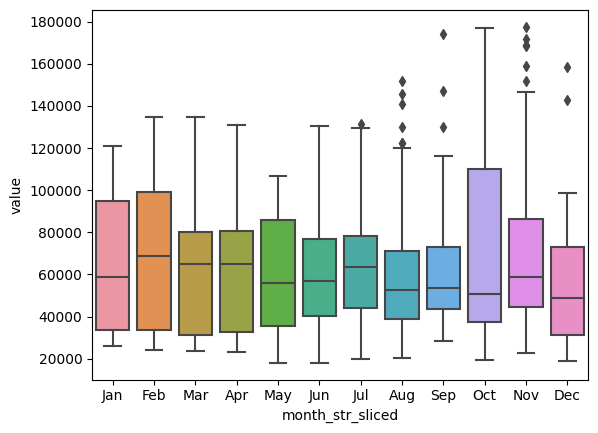

In [92]:
sns.boxplot(data=df,x='month_str_sliced', y='value', order=list_month_cut);

''

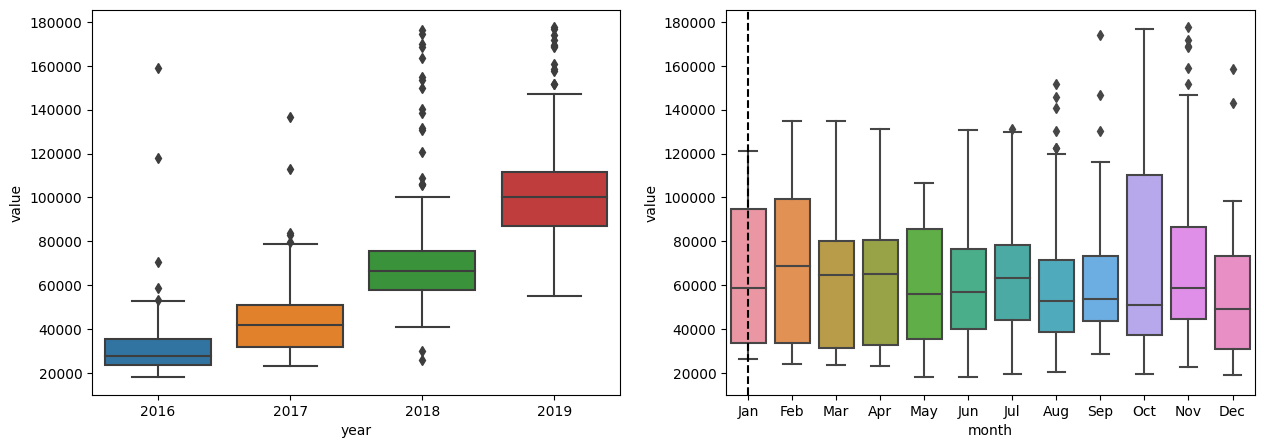

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(data=df, x='year', y='value',ax=axes[0])
sns.boxplot(data=df,x='month_str_sliced', y='value', order=list_month_cut,ax=axes[1])
axes[1].set_xlabel('month')
axes[1].axvline('Jan', color='black', linestyle='--');